In [10]:
import numpy as np
import matplotlib.pyplot as plt

$X_k = \sum\limits_{n=0}^{N-1} x_n · e^{-j · 2 \pi · k · n / N}$

$X_k = \sum\limits_{n=0}^{N-1} x_n · W_N^{kn}$

$W_N^{kn} = \cos\left(2\pi\frac{kn}{N}\right) + j\sin\left(2\pi\frac{kn}{N}\right)$

## Implementación:

Para utilizar únicamente funciones nativas de `numpy`, se calculará la DFT como un producto matricial del vector `xx` (1xN) y la matriz de factores de twiddle (NxN), con las columnas correspondiendo a los diferentes valores de $k$

### Generación de la señal

`fs`: frecuencia de muestreo

`ff`: frecuencia de la señal

`n`: cantidad de muestras a generar

`xx`: vector con los valores de la señal

In [11]:
fs = 8
ff = 2
n = fs

tt = np.linspace(start = 0, stop = (fs - 1) / n, num = n)
xx = np.sin(2 * np.pi * ff * tt)

### Generación de la matriz de Twiddles

Se genera una matriz `kn` que recorre los valores de $n$ en las filas y de $k$ en las columnas.

Luego, dicha matriz se utiliza como parámetro de una función exponencial compleja.

Finalmente, se calcula el producto vectorial entre la matriz y el vector de muestras `xx`

In [12]:
N = len(xx)

nn = np.arange(N)                       # vector fila de valores de n
kk = np.arange(N).reshape((N,1))        # vector columna de valores de k
kn = nn * kk                            # matriz de valores de k y n, para obtener los valores de twiddle

WW = np.exp(-2j * np.pi * kk * nn / N)
XX = np.dot(WW, xx)

### Comparación con el resultado obtenido a través de la fft

In [13]:
from numpy.fft import fft

XX_fft = fft(xx)

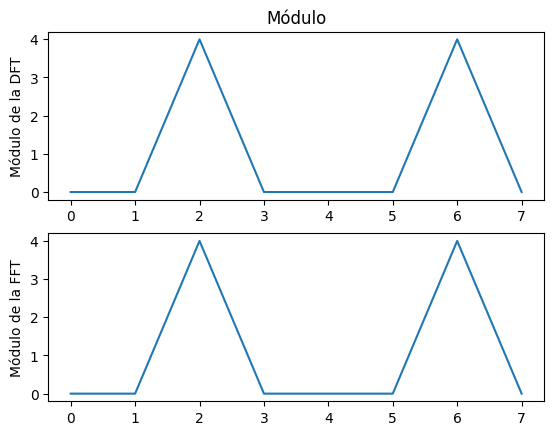

In [14]:
plt.figure()
plt.subplot(2,1,1)
plt.title('Módulo')
plt.ylabel('Módulo de la DFT')
plt.plot(np.abs(XX))
plt.subplot(2,1,2)
plt.ylabel('Módulo de la FFT')
plt.plot(np.abs(XX_fft))
plt.show()

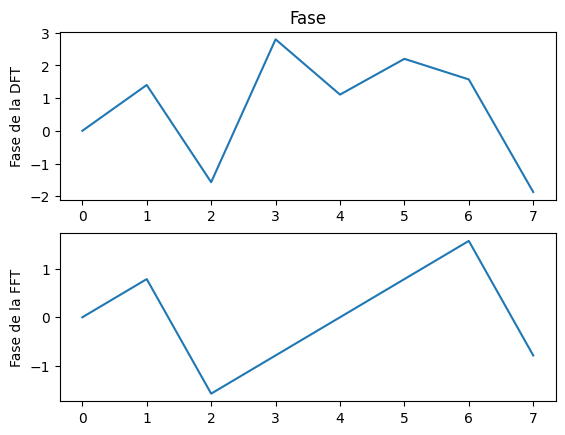

In [20]:
plt.subplot(2,1,1)
plt.title('Fase')
plt.ylabel('Fase de la DFT')
plt.plot(np.angle(XX))
plt.subplot(2,1,2)
plt.ylabel('Fase de la FFT')
plt.plot(np.angle(XX_fft))

Se observa que los valores obtenidos a través de ambos métodos difieren. Sin embargo, en este caso únicamente los bins 2 y 6 contienen información relevante, ya que en los demás el valor de módulo es nulo (por lo cual la fase de los mismos es irrelevante, y puede estar dada por errores numéricos en valores muy pequeños). Para verificar, se analizarán los valores de los bins relevantes.

In [21]:
XX_ph = np.angle(XX)
XX_fft_ph = np.angle(XX_fft)

print(f'Fase en el bin 2 - DFT: {XX_ph[2]} - FFT: {XX_fft_ph[2]}')
print(f'Fase en el bin 6 - DFT: {XX_ph[6]} - FFT: {XX_fft_ph[6]}')

Fase en el bin 2 - DFT: -1.5707963267948966 - FFT: -1.5707963267948968
Fase en el bin 6 - DFT: 1.5707963267948974 - FFT: 1.5707963267948968


En este caso, se observa que ambos coinciden.